In [1]:
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import sys
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [15]:
mean = [0,0,0]
std = [0,0,0]
newX_train = np.ones(x_train.shape)
newX_test = np.ones(x_test.shape)

#train set에 있는 데이터로 mean과 std를 구함
for i in range(3): #channel = 3
  mean[i] = np.mean(x_train[ : , : , : , i])
  std[i] = np.std(x_train[ : , : , : ,i])

#정규화하기 N(0,1)
for i in range(3):
  newX_train[ : , : , : , i] = x_train[ : , : , : ,i] - mean[i]
  newX_train[ : , : , : , i] = newX_train[ : , : , : ,i] / std[i]
  newX_test[ : , : , : , i] = x_test[ : , : , : ,i] - mean[i]
  newX_test[ : , : , : , i] = newX_test[ : , : , : ,i] / std[i]

#newX_train -> x_train -> X_train 
X_train = newX_train
X_test = newX_test

In [18]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

X_train = X_train.reshape(50000, 32, 32, 3)
X_test = X_test.reshape(10000, 32, 32, 3)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [20]:
model = Sequential()

#1
model.add(Conv2D(64, (3,3), input_shape=(32, 32, 3), activation ='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size = 2))

#2
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))

#3
model.add(Conv2D(256, (3,3), activation = 'relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=2))

#4
model.add(Flatten())
model.add(Dense(512, activation ='relu'))

#5
model.add(Dense(512, activation = 'relu'))

#6
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = 'C:\\Users\\PAN\\Desktop\\GItClone\\model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="C:\\Users\\PAN\\Desktop\\GItClone\\model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=256, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 1.87806, saving model to C:\Users\PAN\Desktop\GItClone\model/01-1.8781.hdf5

Epoch 00002: val_loss improved from 1.87806 to 1.63289, saving model to C:\Users\PAN\Desktop\GItClone\model/02-1.6329.hdf5

Epoch 00003: val_loss improved from 1.63289 to 1.41074, saving model to C:\Users\PAN\Desktop\GItClone\model/03-1.4107.hdf5

Epoch 00004: val_loss improved from 1.41074 to 1.26734, saving model to C:\Users\PAN\Desktop\GItClone\model/04-1.2673.hdf5

Epoch 00005: val_loss improved from 1.26734 to 1.22180, saving model to C:\Users\PAN\Desktop\GItClone\model/05-1.2218.hdf5

Epoch 00006: val_loss improved from 1.22180 to 1.20917, saving model to C:\Users\PAN\Desktop\GItClone\model/06-1.2092.hdf5

Epoch 00007: val_loss improved from 1.20917 to 1.12376, saving model to C:\Users\PAN\Desktop\GItClone\model/07-1.1238.hdf5

Epoch 00008: val_loss improved from 1.12376 to 1.02239, saving model to C:\Users\PAN\Desktop\GItClone\model/08-1.0224.hdf5

Epoch 00009

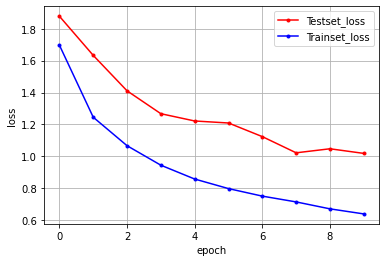

In [22]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# learning ...01:17:41
predictions = model.predict(X_test)
print(prrdictions[0])